<a href="https://colab.research.google.com/github/GiovannaMelo007/Analise-exploratoria/blob/main/Analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise exploratoria do dataset do State of Data Brazil 2022


In [ ]:
#importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import re

In [ ]:
data = pd.read_csv('/content/State_of_data_2022.csv', sep="," )

In [ ]:
data.head(3)

,"('P0', 'id')","('P1_a ', 'Idade')","('P1_a_1 ', 'Faixa idade')","('P1_b ', 'Genero')","('P1_c ', 'Cor/raca/etnia')","('P1_d ', 'PCD')","('P1_e ', 'experiencia_profissional_prejudicada')","('P1_f ', 'aspectos_prejudicados')","('P1_g ', 'vive_no_brasil')","('P1_i ', 'Estado onde mora')",...,"('P8_d_2 ', 'Coletando e limpando os dados que uso para análise e modelagem.')","('P8_d_3 ', 'Entrando em contato com os times de negócio para definição do problema, identificar a solução e apresentação de resultados.')","('P8_d_4 ', 'Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas (produtos de dados).')","('P8_d_5 ', 'Colocando modelos em produção, criando os pipelines de dados, APIs de consumo e monitoramento.')","('P8_d_6 ', 'Cuidando da manutenção de modelos de Machine Learning já em produção, atuando no monitoramento, ajustes e refatoração quando necessário.')","('P8_d_7 ', 'Realizando construções de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.')","('P8_d_8 ', 'Utilizando ferramentas avançadas de estatística como SAS, SPSS, Stata etc, para realizar análises.')","('P8_d_9 ', 'Criando e dando manutenção em ETLs, DAGs e automações de pipelines de dados.')","('P8_d_10 ', 'Criando e gerenciando soluções de Feature Store e cultura de MLOps.')","('P8_d_11 ', 'Criando e mantendo a infra que meus modelos e soluções rodam (clusters, servidores, API, containers, etc.)')"
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df  =pd.DataFrame(data)
#REMOVENDO CARACTERES
df.columns = df.columns.str.replace('P1_a ', '').str.replace('P1_a_1 ', '').str.replace('P1_b ', '').str.replace('P1_c ', '').str.replace("'", "").str.replace(",", "").str.replace("(", "").str.replace(")", "")



<ipython-input-4-c35f4e7421e7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('P1_a ', '').str.replace('P1_a_1 ', '').str.replace('P1_b ', '').str.replace('P1_c ', '').str.replace("'", "").str.replace(",", "").str.replace("(", "").str.replace(")", "")
<ipython-input-4-c35f4e7421e7>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace('P1_a ', '').str.replace('P1_a_1 ', '').str.replace('P1_b ', '').str.replace('P1_c ', '').str.replace("'", "").str.replace(",", "").str.replace("(", "").str.replace(")", "")


In [ ]:
df.head()

,P0 id,Idade,Faixa idade,Genero,Cor/raca/etnia,P1_d PCD,P1_e experiencia_profissional_prejudicada,P1_f aspectos_prejudicados,P1_g vive_no_brasil,P1_i Estado onde mora,...,P8_d_2 Coletando e limpando os dados que uso para análise e modelagem.,P8_d_3 Entrando em contato com os times de negócio para definição do problema identificar a solução e apresentação de resultados.,P8_d_4 Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas produtos de dados.,P8_d_5 Colocando modelos em produção criando os pipelines de dados APIs de consumo e monitoramento.,P8_d_6 Cuidando da manutenção de modelos de Machine Learning já em produção atuando no monitoramento ajustes e refatoração quando necessário.,P8_d_7 Realizando construções de dashboards em ferramentas de BI como PowerBI Tableau Looker Qlik etc.,P8_d_8 Utilizando ferramentas avançadas de estatística como SAS SPSS Stata etc para realizar análises.,P8_d_9 Criando e dando manutenção em ETLs DAGs e automações de pipelines de dados.,P8_d_10 Criando e gerenciando soluções de Feature Store e cultura de MLOps.,P8_d_11 Criando e mantendo a infra que meus modelos e soluções rodam clusters servidores API containers etc.
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
nomes_colunas = df.columns.tolist()
print(nomes_colunas)#exibindo os nomes da lista

['P0 id', ' Idade', ' Faixa idade', ' Genero', ' Cor/raca/etnia', 'P1_d  PCD', 'P1_e  experiencia_profissional_prejudicada', 'P1_f  aspectos_prejudicados', 'P1_g  vive_no_brasil', 'P1_i  Estado onde mora', 'P1_i_1  uf onde mora', 'P1_i_2  Regiao onde mora', 'P1_j  Mudou de Estado?', 'P1_k  Regiao de origem', 'P1_l  Nivel de Ensino', 'P1_m  Área de Formação', 'P2_a  Qual sua situação atual de trabalho?', 'P2_b  Setor', 'P2_c  Numero de Funcionarios', 'P2_d  Gestor?', 'P2_e  Cargo como Gestor', 'P2_f  Cargo Atual', 'P2_g  Nivel', 'P2_h  Faixa salarial', 'P2_i  Quanto tempo de experiência na área de dados você tem?', 'P2_j  Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?', 'P2_k  Você está satisfeito na sua empresa atual?', 'P2_l  Qual o principal motivo da sua insatisfação com a empresa atual?', 'P2_l_1  Falta de oportunidade de crescimento no emprego atual', 'P2_l_2  Salário atual não corresponde ao mercado', 'P2_

In [ ]:
df_existente =pd.DataFrame(df)# criar um novo DataFrame (df_novo) a partir de um DataFrame existente (df_existente)
colunas_importantes= ['P0 id'," Idade", " Faixa idade" ," Genero"," Cor/raca/etnia", "P1_d  PCD", "P1_i  Estado onde mora", "P1_i_2  Regiao onde mora",'P1_l  Nivel de Ensino', "P1_m  Área de Formação", "P2_a  Qual sua situação atual de trabalho?", "P2_b  Setor",
                      "P2_f  Cargo Atual","P2_g  Nivel", "P2_h  Faixa salarial", "P2_i  Quanto tempo de experiência na área de dados você tem?", 'P2_k  Você está satisfeito na sua empresa atual?', 'P2_l  Qual o principal motivo da sua insatisfação com a empresa atual?', 'P4_d  Quais das linguagens listadas abaixo você utiliza no trabalho?' ]
df_novo = df_existente[colunas_importantes]# selecionando colunas específicas para um dataframe novo
df_novo.head(10)

,P0 id,Idade,Faixa idade,Genero,Cor/raca/etnia,P1_d PCD,P1_i Estado onde mora,P1_i_2 Regiao onde mora,P1_l Nivel de Ensino,P1_m Área de Formação,P2_a Qual sua situação atual de trabalho?,P2_b Setor,P2_f Cargo Atual,P2_g Nivel,P2_h Faixa salarial,P2_i Quanto tempo de experiência na área de dados você tem?,P2_k Você está satisfeito na sua empresa atual?,P2_l Qual o principal motivo da sua insatisfação com a empresa atual?,P4_d Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Distrito Federal (DF),Centro-oeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público,Setor Público,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,True,NaN,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,Pará (PA),Norte,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT),Outra Opção,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,False,Falta de oportunidade de crescimento no empreg...,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,Distrito Federal (DF),Centro-oeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,False,Falta de oportunidade de crescimento no empreg...,"Python, JavaScript"
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,Minas Gerais (MG),Sudeste,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT),Setor Automotivo,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,True,NaN,"SQL, R, Python"
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Pará (PA),Norte,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público,Setor Público,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,False,Falta de oportunidade de crescimento no empreg...,SQL
5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Ceará (CE),Nordeste,Pós-graduação,Ciências Biológicas/ Farmácia/ Medicina/ Área ...,Servidor Público,Educação,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,False,Gostaria de trabalhar em em outra área de atua...,Não utilizo nenhuma das linguagens listadas
6,zytlxsdgalh22cgrijvzytlxa49i8yzx,21.0,17-21,Masculino,Parda,Não,São Paulo (SP),Sudeste,Estudante de Graduação,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT),Finanças ou Bancos,Analista de BI/BI Analyst,Júnior,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,True,NaN,"SQL, Python, SAS/Stata"
7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Rio Grande do Sul (RS),Sul,Graduação/Bacharelado,Ciências Sociais,Empregado (CLT),Tecnologia/Fábrica de Software,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,False,Gostaria de trabalhar em em outra área de atua...,"SQL, JavaScript"
8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,São Paulo (SP),Sudeste,Pós-graduação,Economia/ Administração / Contabilidade / Fina...,Empregado (CLT),Tecnologia/Fábrica de Software,Analista de BI/BI Analyst,Sênior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,True,NaN,"SQL, Visual Basic/VBA"
9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Bahia (BA),Nordeste,Pós-graduação,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT),Educação,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,True,NaN,SQL


 substituindo nomes específicos das colunas

In [ ]:
df_novo.columns = df_novo.columns.str.replace('P1_e ', '').str.replace('P1_f ', '').str.replace('P1_g ', '').str.replace('P1_i_1', '').str.replace("P1_j", "").str.replace("P1_k", "").str.replace("P1_d ", "").str.replace("P1_i ", "").str.replace("P1_i_2 ", "").str.replace('P1_l ', '').str.replace('P1_m ', '').str.replace('P2_a ', '').str.replace('P2_b ', '').str.replace('P2_f ', '').str.replace('P2_g ', '').str.replace('P2_h ', '').str.replace('P2_i ', '').str.replace('P2_k ', '').str.replace('P2_l ', '').str.replace('P4_d ', '')


In [ ]:
nomes_colunas = df_novo.columns.tolist()
print(nomes_colunas)

['P0 id', ' Idade', ' Faixa idade', ' Genero', ' Cor/raca/etnia', ' PCD', ' Estado onde mora', ' Regiao onde mora', ' Nivel de Ensino', ' Área de Formação', ' Qual sua situação atual de trabalho?', ' Setor', ' Cargo Atual', ' Nivel', ' Faixa salarial', ' Quanto tempo de experiência na área de dados você tem?', ' Você está satisfeito na sua empresa atual?', ' Qual o principal motivo da sua insatisfação com a empresa atual?', ' Quais das linguagens listadas abaixo você utiliza no trabalho?']


In [ ]:
nomes_novos = {
    " Estado onde mora": 'Estado_onde_mora',
    " Regiao onde mora": 'Regiao_onde_mora',
    " Nivel de Ensino": 'Nivel_de_Ensino',
     " Área de Formação": 'Area_de_Formacao',
    " Qual sua situação atual de trabalho?": 'situacao_atual_de_trabalho',
    " Setor": 'Setor',
    " Cargo Atual": 'Cargo_Atual',
    " Nivel": 'Nivel_Profissonal',
    " Faixa salarial": 'Faixa_salarial',
    " Quanto tempo de experiência na área de dados você tem?": 'Quanto_tempo_de_experiencia',
    " Você está satisfeito na sua empresa atual?": 'satisfeito_na_empresa_atual',
    " Qual o principal motivo da sua insatisfação com a empresa atual?":  'insatisfacao_com_a_empresa_atual',
    " Quais das linguagens listadas abaixo você utiliza no trabalho?": 'linguagens_voce_utiliza _o_trabalho'
}

# renomeando as colunas para nao houver problemas futuros com caracteres
df_novo.rename(columns= nomes_novos, inplace=True)

<ipython-input-10-c64ce94601b2>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_novo.rename(columns= nomes_novos, inplace=True)


In [ ]:
df_novo.head()

,P0 id,Idade,Faixa idade,Genero,Cor/raca/etnia,PCD,Estado_onde_mora,Regiao_onde_mora,Nivel_de_Ensino,Area_de_Formacao,situacao_atual_de_trabalho,Setor,Cargo_Atual,Nivel_Profissonal,Faixa_salarial,Quanto_tempo_de_experiencia,satisfeito_na_empresa_atual,insatisfacao_com_a_empresa_atual,linguagens_voce_utiliza _o_trabalho
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Distrito Federal (DF),Centro-oeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público,Setor Público,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,True,NaN,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,Pará (PA),Norte,Graduação/Bacharelado,Outras Engenharias,Empregado (CLT),Outra Opção,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,False,Falta de oportunidade de crescimento no empreg...,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,Distrito Federal (DF),Centro-oeste,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Empregado (CLT),Finanças ou Bancos,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,False,Falta de oportunidade de crescimento no empreg...,"Python, JavaScript"
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,Minas Gerais (MG),Sudeste,Doutorado ou Phd,Estatística/ Matemática / Matemática Computaci...,Empregado (CLT),Setor Automotivo,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,True,NaN,"SQL, R, Python"
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Pará (PA),Norte,Pós-graduação,Computação / Engenharia de Software / Sistemas...,Servidor Público,Setor Público,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,False,Falta de oportunidade de crescimento no empreg...,SQL


In [ ]:
df2=df_novo#craindo outro data

In [ ]:
#veriicando duplicadas
df2.duplicated().sum()

1

In [ ]:
#Verificando  valores nan
df2.isna().sum()

P0 id                                     0
 Idade                                   74
 Faixa idade                              0
 Genero                                   9
 Cor/raca/etnia                           0
 PCD                                      0
Estado_onde_mora                        115
Regiao_onde_mora                        100
Nivel_de_Ensino                           0
Area_de_Formacao                        122
situacao_atual_de_trabalho                0
Setor                                   577
Cargo_Atual                            1290
Nivel_Profissonal                      1290
Faixa_salarial                          577
Quanto_tempo_de_experiencia             577
satisfeito_na_empresa_atual             577
insatisfacao_com_a_empresa_atual       3311
linguagens_voce_utiliza _o_trabalho    1290
dtype: int64

In [ ]:
df2[' Genero'].value_counts()#contando variaveis de uma colunas especifica

Masculino               3194
Feminino                1056
Prefiro não informar      12
Name:  Genero, dtype: int64

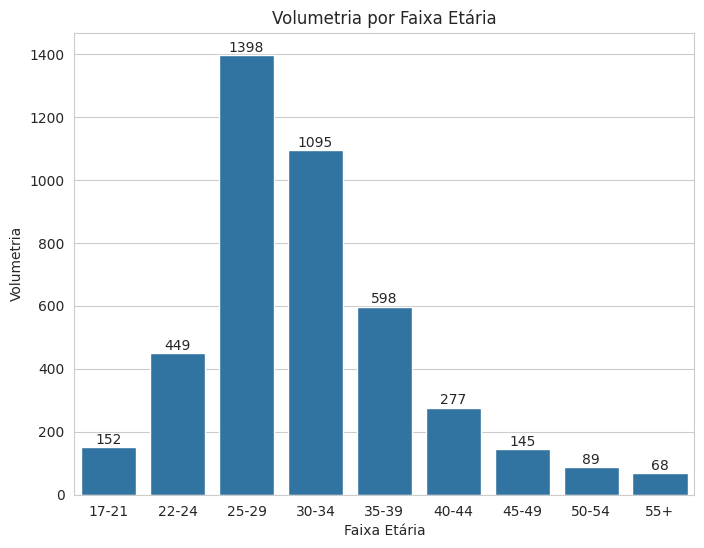

In [ ]:
# Contagem dos valores na coluna "Faixa idade"
contagem_faixa_idade = df2[' Faixa idade'].value_counts().sort_index()

sns.set_style("whitegrid")  #  estilo do gráfico
plt.figure(figsize=(8, 6))  #  tamanho da figura

# paleta de cores
ax = sns.barplot(x=contagem_faixa_idade.index, y=contagem_faixa_idade.values )

plt.xlabel("Faixa Etária")# Adicionando rótulos aos eixos
plt.ylabel("Volumetria")# Adicionando rótulos aos eixos

# Adicionando titulo ao gráfico
plt.title("Volumetria por Faixa Etária")

#  rótulos de contagem em cima de cada barra
for index, value in enumerate(contagem_faixa_idade.values):
    ax.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()


O gráfico de barras apresenta a distribuição da faixa etária dos participantes na pesquisa "State of Data Brazil 2022". A faixa etária mais frequente foi de 25 a 29 anos, indicando que esse grupo demográfico foi o mais representado no mapeamento completo do cenário atual da área de dados no Brasil. A volumetria mostra a quantidade de respondentes em cada faixa etária, sendo que a faixa de 25-29 anos teve a maior contagem, conforme indicado pelos rótulos sobre as barras.

<ipython-input-17-4cb7cc660428>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, palette=cores_customizadas)
<ipython-input-17-4cb7cc660428>:14: UserWarning: 
The palette list has fewer values (3) than needed (7) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, palette=cores_customizadas)


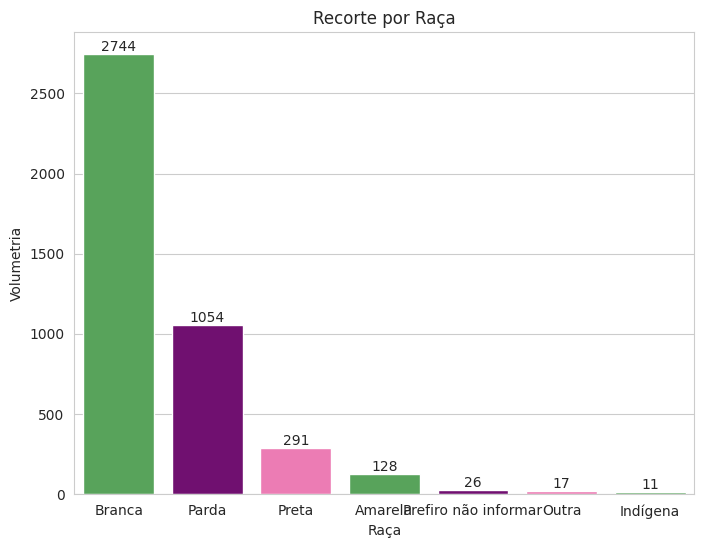

In [ ]:
 # Contagem dos valores na coluna "Cor/raca/etnia"
contagem_raca = df2[' Cor/raca/etnia'].value_counts()

#  paleta de cores
cores_customizadas = ["#4CAF50", "#800080", "#FF69B4"]
sns.set_style("whitegrid")# estilo do gráfico
plt.figure(figsize=(8, 6))#tamanho da figura

#  cores personalizada
ax = sns.barplot(x=contagem_raca.index, y=contagem_raca.values, palette=cores_customizadas)
plt.xlabel("Raça")# rotulos aos eixos
plt.ylabel("Volumetria")# rotulos aos eixos

plt.title("Recorte por Raça")
for index, value in enumerate(contagem_raca.values):
    ax.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()


O gráfico de barras mostra a distribuição da raça/etnia dos participantes na pesquisa, evidenciando que a maioria é composta por pessoas brancas, totalizando 2744 respondentes. Os participantes pardos representam 1054, enquanto os pretos somam 291.

A predominância de participantes brancos na pesquisa "State of Data Brazil 2022" pode refletir desigualdades históricas no acesso à educação e oportunidades profissionais. As disparidades socioeconômicas e o acesso limitado a recursos educacionais podem contribuir para a menor representatividade de grupos pardos e pretos. Esses resultados destacam a necessidade de ações inclusivas para promover diversidade e equalizar oportunidades na área de dados no Brasil.

In [ ]:
import plotly.express as px
import pandas as pd


# Calculando as porcentagens
porcentagens = (df2['Nivel_de_Ensino'].value_counts(normalize=True) * 100).reset_index()
porcentagens.columns = ['Nivel_de_Ensino', 'Porcentagem']

#   gráfico horizontal
fig = px.bar(porcentagens, x='Porcentagem', y='Nivel_de_Ensino', orientation='h',
             title='Distribuição Percentual por Nível de Ensino')


fig.show()



A predominância de participantes com graduação/bacharelado cvom maios de 35% na pesquisa "State of Data Brazil 2022" sugere uma forte presença de profissionais com formação acadêmica sólida na área  .

In [ ]:
df2['Nivel_de_Ensino'].value_counts()

Graduação/Bacharelado         1510
Pós-graduação                 1314
Estudante de Graduação         613
Mestrado                       521
Doutorado ou Phd               191
Não tenho graduação formal     110
Prefiro não informar            12
Name: Nivel_de_Ensino, dtype: int64

In [ ]:
import plotly.express as px
import pandas as pd

def plotly_bar_grouped_cat_feats(df, category_col, group_col, title, category_order, stacked, color_dict=None, legend_dict=None, x_axis_title=None, y_axis_title=None):
    # Filtrando o DataFrame para a categoria especiífica
    df_filtered = df2[df2[category_col].isin(category_order)]

    # Calculando as porcentagens de cada categoria
    porcentagens = (df_filtered[group_col].value_counts(normalize=True) * 100).reset_index()
    porcentagens.columns = [group_col, 'Porcentagem']

    # Criando um grafico agrupado
    fig = px.bar(porcentagens, x=group_col, y='Porcentagem', color=group_col,
                 title=title, category_orders={group_col: category_order},
                 labels={group_col: x_axis_title, 'Porcentagem': y_axis_title},
                 color_discrete_map=color_dict, template='plotly_white', height=500, width=800,
                 )


    if legend_dict:
        fig.update_layout(legend=legend_dict) # legenda personalizada


    fig.show()


# Definindoo a ordem desejada para as categorias
nivel_order = ['Graduação/Bacharelado', 'Pós-graduação', 'Estudante de Graduação', 'Mestrado', 'Doutorado ou Phd', 'Não tenho graduação formal', 'Prefiro não informar']

# Definindo as cores desejadas para cada categoria
cores_nivel = {'Graduação/Bacharelado': 'blue', 'Pós-graduação': 'green', 'Estudante de Graduação': 'orange', 'Mestrado': 'red', 'Doutorado ou Phd': 'purple', 'Não tenho graduação formal': 'brown', 'Prefiro não informar': 'gray'}

#  gráfico para a coluna 'Nivel_de_Ensino'
plotly_bar_grouped_cat_feats(df, 'Nivel_de_Ensino', ' Cor/raca/etnia',
                              'Proporção de Cor/Raça/Etnia por Nível de Ensino',
                              nivel_order,True,color_dict=cores_nivel, x_axis_title='Níveis de Graduação', y_axis_title='Porcentagem')


In [ ]:
nivel_counts = df2['Nivel_de_Ensino'].value_counts()
cor_counts = df2[' Cor/raca/etnia'].value_counts()

# Calculando as porcentagens
nivel_percentages = nivel_counts / len(df2) * 100
cor_percentages = cor_counts / len(df2) * 100

#os resultados
print("Porcentagem de Nivel_de_Ensino:")
print(nivel_percentages)

print("\nPorcentagem de Cor/raca/etnia:")
print(cor_percentages)

Porcentagem de Nivel_de_Ensino:
Graduação/Bacharelado         35.354718
Pós-graduação                 30.765629
Estudante de Graduação        14.352611
Mestrado                      12.198548
Doutorado ou Phd               4.472021
Não tenho graduação formal     2.575509
Prefiro não informar           0.280965
Name: Nivel_de_Ensino, dtype: float64

Porcentagem de Cor/raca/etnia:
Branca                  64.247249
Parda                   24.678061
Preta                    6.813393
Amarela                  2.996956
Prefiro não informar     0.608757
Outra                    0.398033
Indígena                 0.257551
Name:  Cor/raca/etnia, dtype: float64


A análise revela que a maioria dos participantes possui graduação/bacharelado (35.35%), seguido por pós-graduação (30.77%) e estudantes de graduação (14.35%). Quanto à etnia, a maioria dos respondentes é branca (64.25%), seguida por pardos (24.68%) e pretos (6.81%). Esses resultados indicam uma diversidade educacional, com uma concentração significativa de profissionais com níveis mais elevados de formação. A análise é complementada pela representatividade racial, destacando a necessidade de promover inclusão e diversidade no cenário de dados no Brasil.

#Nível de escolaridade

In [ ]:
def plotly_bar_grouped_cat_feats(df3, category_col, group_col, title, category_order, stacked, color_dict=None, legend_dict=None, x_axis_title=None, y_axis_title=None):
    # Filtrando  o DataFrame para a categoria especifica
    df_filtered = df3[df3[category_col].isin(category_order)]

    # Calculando as porcentagens
    porcentagens = (df_filtered.groupby([category_col, group_col]).size() / df_filtered.groupby(category_col).size() * 100).reset_index()
    porcentagens.columns = [category_col, group_col, 'Porcentagem']

    # Criando um gráfico agrupado
    fig = px.bar(porcentagens, x=category_col, y='Porcentagem', color=group_col,
                 title=title, category_orders={category_col: category_order},
                 labels={category_col: x_axis_title, 'Porcentagem': y_axis_title},
                 color_discrete_map=color_dict,template='plotly_white',height=500,width=800,
                 )

    # legenda personalizada
    if legend_dict:
        fig.update_layout(legend=legend_dict)
    fig.show()

#  gráfico para a coluna 'Nivel_de_Ensino' e 'Genero'
plotly_bar_grouped_cat_feats(df3, 'Nivel_de_Ensino', ' Genero',
                              'Proporção de Gênero por Nível de Ensino',nivel_order,True,color_dict={'Masculino': 'blue', 'Feminino': 'pink'},x_axis_title='Níveis de Graduação', y_axis_title='Porcentagem')



O gráfico revela uma predominância masculina em todos os níveis de ensino, com destaque para a graduação, onde os homens representam mais de 75%, enquanto as mulheres compõem pouco mais de 24%. Essa discrepância pode refletir desigualdades históricas e estruturais na área de educação e tecnologia, onde tradicionalmente os homens têm sido mais representados. A falta de diversidade de gênero pode também ser influenciada por estereótipos culturais e barreiras percebidas, contribuindo para a sub-representação das mulheres. A promoção de iniciativas inclusivas e políticas de equidade de gênero pode ser crucial para mitigar essas disparidades e criar um ambiente mais diversificado e igualitário na área de dados.







# Diferenças salariais


In [ ]:
import plotly.express as px
import pandas as pd


abs_genero = pd.crosstab(df3["Faixa_salarial"], df3[" Genero"])

women_pop = list(abs_genero.Feminino)
men_pop = list(abs_genero.Masculino)
men_pop = [element * -1 for element in men_pop]

faixa = list(abs_genero.index.values)

fig = px.bar(
    x=men_pop + women_pop, y=faixa * 2,   orientation='h',
    color=['Masculino'] * len(men_pop) + ['Feminino'] * len(women_pop),
    labels={'y': 'Faixa salarial', 'x': 'População'},
    title='Pirâmide salarial segundo o gênero',color_discrete_map={'Masculino': 'lightblue', 'Feminino': '#FFB6C1'},template='plotly_white',#
)

fig.show()



A análise da distribuição salarial revela uma disparidade notável entre os gêneros, evidenciando uma presença significativamente menor de mulheres em todas as faixas salariais. No entanto, essa discrepância atinge proporções alarmantes na faixa salarial superior a 40 mil e o salario de 30k , onde a representação feminina praticamente desaparece. Esta visualização não apenas ilustra as diferenças salariais entre homens e mulheres, mas também destaca a marcante falta de representatividade feminina no cenário profissional relacionado a dados. Essa observação levanta questões mais amplas sobre a equidade de gênero e a necessidade de abordar as barreiras que limitam a participação das mulheres nesse setor específico.

In [ ]:
tab = pd.concat(
[pd.crosstab(index=df3[" Genero"], columns = 'count').transpose(),
pd.crosstab(index=df3[" Genero"], columns = 'count',normalize=True).transpose()*100]).T

# mudando o nome das colunas
tab.set_axis(['Freq',"%"],axis=1,inplace=True)

tab.index.name = 'Gênero'

tab

<ipython-input-58-0633400deb5e>:6: FutureWarning:

DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead



,Freq,%
Gênero,,
Feminino,1056.0,24.777100
Masculino,3194.0,74.941342
Prefiro não informar,12.0,0.281558



A tabela apresenta a contagem e a porcentagem de participantes por gênero na amostra. Dos respondentes, 24.78% identificaram-se como feminino, 74.94% como masculino, e 0.28% optaram por não informar o gênero. A discrepância entre os gêneros sugere uma representação majoritária de homens na pesquisa, refletindo uma tendência comum em setores relacionados à tecnologia e dados, onde a diversidade de gênero ainda é um desafio

#Relação entre Salário e Pessoas com Deficiência (PCD)

In [ ]:
import plotly.express as px
import pandas as pd


abs_pcd = pd.crosstab(df3["Faixa_salarial"], df3[" PCD"])

pcd_pop = list(abs_pcd['Sim'])
non_pcd_pop = list(abs_pcd['Não'])
non_pcd_pop = [-1 * element for element in non_pcd_pop]

faixa = list(abs_pcd.index.values)

fig = px.bar(
    x=non_pcd_pop + pcd_pop,y=faixa * 2,  orientation='h',
    color=['Não'] * len(non_pcd_pop) + ['Sim'] * len(pcd_pop),
    labels={'y': 'Faixa salarial', 'x': 'População'},
    title='Pirâmide salarial segundo a PCD',
    color_discrete_map={'Não': 'lightblue', 'Sim': '#FFB6C1'}, template='plotly_white',
)

fig.update_yaxes(categoryorder='total ascending')

fig.show()


O gráfico de barras vertical analisado representa a relação entre salários e a presença de Pessoas com Deficiência (PCD). Observa-se uma disparidade significativa, com um número substancialmente menor de PCDs em todas as faixas salariais em comparação com o grupo não PCD. Notavelmente, não há representação de PCDs com salários acima de 40 mil, sugerindo possíveis barreiras ou discriminação. Esses resultados ressaltam a necessidade urgente de abordagens mais inclusivas e políticas de igualdade salarial para promover a equidade e a inclusão efetiva das PCDs no mercado de trabalho.

In [ ]:
df3=df2

#  número de pessoas por região

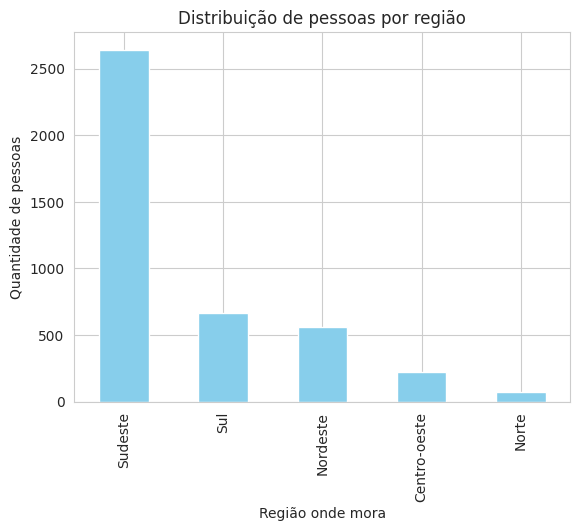

In [ ]:
contagem_regiao = df3['Regiao_onde_mora'].value_counts()
contagem_regiao.plot(kind='bar', color='skyblue')

# Adicionando rótulos e título
plt.xlabel('Região onde mora')
plt.ylabel('Quantidade de pessoas')
plt.title('Distribuição de pessoas por região')
plt.show()


O gráfico de barras analisado, que representa o número de pessoas por região, destaca uma disparidade marcante, especialmente na região Sudeste, onde a população ultrapassa 2500 pessoas, contrastando com outras regiões. Essa discrepância levanta questões sobre fatores socioeconômicos, como oportunidades econômicas e políticas regionais, que influenciam a distribuição demográfica.

In [ ]:


def plotly_bar_grouped_cat_feats(df3, cat_col1, cat_col2, title, show_legend, color_dict, legend_dict, x_axis_title, y_axis_title):
    fig = px.bar(df3,x=cat_col1,color=cat_col2,color_discrete_map=color_dict, labels={cat_col1: x_axis_title, cat_col2: y_axis_title},title=title
                )

    fig.update_layout(legend=legend_dict, showlegend=show_legend)
    fig.update_xaxes(type='category')

    fig.show()

plotly_bar_grouped_cat_feats(
    df3, 'Nivel_de_Ensino', 'Nivel_Profissonal',
    'Proporção dos níveis em tempo de experiência em dados',
    True,color_dict=colors,legend_dict=legends['top_out'],
    x_axis_title='Tempo de experiência em dados',y_axis_title='Porcentagem'
)

plotly_bar_grouped_cat_feats(
    df3, 'Nivel_de_Ensino', 'Faixa_Salarial',
    'Proporção das faixas salariais em tempo de experiência em dados',
    True, color_dict=colors, legend_dict=legends['top_out'],x_axis_title='Tempo de experiência em dados',y_axis_title='Porcentagem'
)

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['P0 id', ' Idade', ' Faixa idade', ' Genero', ' Cor/raca/etnia', 'P1_d  PCD', 'P1_e  experiencia_profissional_prejudicada', 'P1_f  aspectos_prejudicados', 'P1_g  vive_no_brasil', 'P1_i  Estado onde mora', 'P1_i_1  uf onde mora', 'P1_i_2  Regiao onde mora', 'P1_j  Mudou de Estado?', 'P1_k  Regiao de origem', 'P1_l  Nivel de Ensino', 'P1_m  Área de Formação', 'P2_a  Qual sua situação atual de trabalho?', 'P2_b  Setor', 'P2_c  Numero de Funcionarios', 'P2_d  Gestor?', 'P2_e  Cargo como Gestor', 'P2_f  Cargo Atual', 'P2_g  Nivel', 'P2_h  Faixa salarial', 'P2_i  Quanto tempo de experiência na área de dados você tem?', 'P2_j  Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?', 'P2_k  Você está satisfeito na sua empresa atual?', 'P2_l  Qual o principal motivo da sua insatisfação com a empresa atual?', 'P2_l_1  Falta de oportunidade de crescimento no emprego atual', 'P2_l_2  Salário atual não corresponde ao mercado', 'P2_l_3  Não tenho uma boa relação com meu líder/gestor', 'P2_l_4  Gostaria de trabalhar em em outra área de atuação', 'P2_l_5  Gostaria de receber mais benefícios', 'P2_l_6  O clima de trabalho/ambiente não é bom', 'P2_l_7  Falta de maturidade analítica na empresa', 'P2_m  Você participou de entrevistas de emprego nos últimos 6 meses?', 'P2_n  Você pretende mudar de emprego nos próximos 6 meses?', 'P2_o  Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?', 'P2_o_1  Remuneração/Salário', 'P2_o_2  Benefícios', 'P2_o_3  Propósito do trabalho e da empresa', 'P2_o_4  Flexibilidade de trabalho remoto', 'P2_o_5  Ambiente e clima de trabalho', 'P2_o_6  Oportunidade de aprendizado e trabalhar com referências na área', 'P2_o_7  Plano de carreira e oportunidades de crescimento profissional', 'P2_o_8  Maturidade da empresa em termos de tecnologia e dados', 'P2_o_9  Qualidade dos gestores e líderes', 'P2_o_10  Reputação que a empresa tem no mercado', 'P2_p  Atualmente qual a sua forma de trabalho?', 'P2_q  Qual a forma de trabalho ideal para você?', 'P2_r  Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?', 'P2_s  Sua empresa passu por Layoff em 2022?', 'P3_a  Qual o número aproximado de pessoas que atuam com dados na sua empresa hoje?', 'P3_b  Quais desses papéis/cargos fazem parte do time ou chapter de dados da sua empresa?', 'P3_b_1  Analytics Engineer', 'P3_b_2  Engenharia de Dados/Data Engineer', 'P3_b_3  Analista de Dados/Data Analyst', 'P3_b_4  Cientista de Dados/Data Scientist', 'P3_b_5  Database Administrator/DBA', 'P3_b_6  Analista de Business Intelligence/BI', 'P3_b_7  Arquiteto de Dados/Data Architect', 'P3_b_8  Data Product Manager/DPM', 'P3_b_9  Business Analyst', 'P3_c  Quais dessas responsabilidades fazem parte da sua rotina atual de trabalho como gestor?', 'P3_c_1  Pensar na visão de longo prazo de dados da empresa e fortalecimento da cultura analítica da companhia.', 'P3_c_2  Organização de treinamentos e iniciativas com o objetivo de aumentar a maturidade analítica das áreas de negócios.', 'P3_c_3  Atração seleção e contratação de talentos para o time de dados.', 'P3_c_4  Decisão sobre contratação de ferramentas e tecnologias relacionadas a dados.', 'P3_c_5  Sou gestor da equipe responsável pela engenharia de dados e por manter o Data Lake da empresa como fonte única dos dados garantindo a qualidade e confiabilidade da informação.', 'P3_c_6  Sou gestor da equipe responsável pela entrega de dados estudos relatórios e dashboards para as áreas de negócio da empresa.', 'P3_c_7  Sou gestor da equipe responsável por iniciativas e projetos envolvendo Inteligência Artificial e Machine Learning.', 'P3_c_8  Apesar de ser gestor ainda atuo na parte técnica construindo soluções/análises/modelos etc.', 'P3_c_9  Gestão de projetos de dados cuidando das etapas equipes envolvidas atingimento dos objetivos etc.', 'P3_c_10  Gestão de produtos de dados cuidando da visão dos produtos backlog feedback de usuários etc.', 'P3_c_11  Gestão de pessoas apoio no desenvolvimento das pessoas evolução de carreira', 'P3_d  Quais são os 3 maiores desafios que você tem como gestor no atual momento?', 'P3_d_1  a Contratar novos talentos.', 'P3_d_2  b Reter talentos.', 'P3_d_3  c Convencer a empresa a aumentar os investimentos na área de dados.', 'P3_d_4  d Gestão de equipes no ambiente remoto.', 'P3_d_5  e Gestão de projetos envolvendo áreas multidisciplinares da empresa.', 'P3_d_6  f Organizar as informações e garantir a qualidade e confiabilidade.', 'P3_d_7  g Conseguir processar e armazenar um alto volume de dados.', 'P3_d_8  h Conseguir gerar valor para as áreas de negócios através de estudos e experimentos.', 'P3_d_9  i Desenvolver e manter modelos Machine Learning em produção.', 'P3_d_10  j Gerenciar a expectativa das áreas de negócio em relação as entregas das equipes de dados.', 'P3_d_11  k Garantir a manutenção dos projetos e modelos em produção em meio ao crescimento da empresa.', 'P3_d_12  Conseguir levar inovação para a empresa através dos dados.', 'P3_d_13  Garantir retorno do investimento ROI em projetos de dados.', 'P3_d_14  Dividir o tempo entre entregas técnicas e gestão.', 'P4_a  Mesmo que esse não seja seu cargo formal você considera que sua atuação no dia a dia reflete alguma das opções listadas abaixo?', 'P4_a_1  Atuacao', 'P4_b  Quais das fontes de dados listadas você já analisou ou processou no trabalho?', 'P4_b_1  Dados relacionais estruturados em bancos SQL', 'P4_b_2  Dados armazenados em bancos NoSQL', 'P4_b_3  Imagens', 'P4_b_4  Textos/Documentos', 'P4_b_5  Vídeos', 'P4_b_6  Áudios', 'P4_b_7  Planilhas', 'P4_b_8  Dados georeferenciados', 'P4_c  Entre as fontes de dados listadas quais você utiliza na maior parte do tempo?', 'P4_c_1  Dados relacionais estruturados em bancos SQL', 'P4_c_2  Dados armazenados em bancos NoSQL', 'P4_c_3  Imagens', 'P4_c_4  Textos/Documentos', 'P4_c_5  Vídeos', 'P4_c_6  Áudios', 'P4_c_7  Planilhas', 'P4_c_8  Dados georeferenciados', 'P4_d  Quais das linguagens listadas abaixo você utiliza no trabalho?', 'P4_d_1  SQL', 'P4_d_2  R ', 'P4_d_3  Python', 'P4_d_4  C/C++/C#', 'P4_d_5  .NET', 'P4_d_6  Java', 'P4_d_7  Julia', 'P4_d_8  SAS/Stata', 'P4_d_9  Visual Basic/VBA', 'P4_d_10  Scala', 'P4_d_11  Matlab', 'P4_d_12  PHP', 'P4_d_13  Javascript', 'P4_d_14  Não utilizo nenhuma linguagem', 'P4_e  Entre as linguagens listadas abaixo qual é a que você mais utiliza no trabalho?', 'P4_f  Entre as linguagens listadas abaixo qual é a sua preferida?', 'P4_g  Quais dos bancos de dados/fontes de dados listados abaixo você utiliza no trabalho?', 'P4_g_1  MySQL', 'P4_g_2  Oracle', 'P4_g_3  SQL SERVER', 'P4_f_4  Amazon Aurora ou RDS', 'P4_f_5  DynamoDB', 'P4_f_6  CoachDB', 'P4_f_7  Cassandra', 'P4_f_8  MongoDB', 'P4_f_9  MariaDB', 'P4_f_10  Datomic', 'P4_f_11  S3', 'P4_f_12  PostgreSQL', 'P4_f_13  ElasticSearch', 'P4_f_14  DB2', 'P4_f_15  Microsoft Access', 'P4_f_16  SQLite', 'P4_f_17  Sybase', 'P4_f_18  Firebase', 'P4_f_19  Vertica', 'P4_f_20  Redis', 'P4_f_21  Neo4J', 'P4_f_22  Google BigQuery', 'P4_f_23  Google Firestore', 'P4_f_24  Amazon Redshift', 'P4_f_25  Amazon Athena', 'P4_f_26  Snowflake', 'P4_f_27  Databricks', 'P4_f_28  HBase', 'P4_f_29  Presto', 'P4_f_30  Splunk', 'P4_f_31  SAP HANA', 'P4_f_32  Hive', 'P4_f_33  Firebird', 'P4_g  Quais das opções de Cloud listadas abaixo você utiliza no trabalho?', 'P4_h  Dentre as opções listadas qual sua Cloud preferida?', 'P4_h_1  Azure Microsoft', 'P4_h_2  Amazon Web Services AWS', 'P4_h_3  Google Cloud GCP', 'P4_i  Microsoft PowerBI', 'P4_i_1  Microsoft PowerBI', 'P4_i_2  Qlik View/Qlik Sense', 'P4_i_3  Tableau', 'P4_i_4  Metabase', 'P4_i_5  Superset', 'P4_i_6  Redash', 'P4_i_7  MicroStrategy', 'P4_i_8  IBM Analytics/Cognos', 'P4_i_9  SAP Business Objects', 'P4_i_10  Oracle Business Intelligence', 'P4_i_11  Amazon QuickSight', 'P4_i_12  Salesforce/Einstein Analytics', 'P4_i_13  Mode', 'P4_i_14  Alteryx', 'P4_i_15  Birst', 'P4_i_16  Looker', 'P4_i_17  Google Data Studio', 'P4_i_18  SAS Visual Analytics', 'P4_i_19  Grafana', 'P4_i_20  TIBCO Spotfire', 'P4_i_21  Pentaho', 'P4_i_22  Fazemos todas as análises utilizando apenas Excel ou planilhas do google', 'P4_i_23  Não utilizo nenhuma ferramenta de BI no trabalho', 'P5_a  Qual seu objetivo na área de dados?', 'P5_b  Qual oportunidade você está buscando?', 'P5_c  Há quanto tempo você busca uma oportunidade na área de dados?', 'P5_d  Como tem sido a busca por um emprego na área de dados?', 'P6_a  Quais das opções abaixo fazem parte da sua rotina no trabalho atual como engenheiro de dados?', 'P6_a_1  Desenvolvo pipelines de dados utilizando linguagens de programação como Python Scala Java etc.', 'P6_a_2  Realizo construções de ETLs em ferramentas como Pentaho Talend Dataflow etc.', 'P6_a_3  Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.', 'P6_a_4  Atuo na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data Fivetran etc.', 'P6_a_5  Modelo soluções de arquitetura de dados criando componentes de ingestão de dados transformação e recuperação da informação.', 'P6_a_6  Desenvolvo/cuido da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.', 'P6_a_7  Atuo na modelagem dos dados com o objetivo de criar conjuntos de dados como Data Warehouses Data Marts etc.', 'P6_a_8  Cuido da qualidade dos dados metadados e dicionário de dados.', 'P6_a_9  Nenhuma das opções listadas refletem meu dia a dia.', 'P6_b  Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Engineer?', 'P6_b_1  Scripts Python', 'P6_b_2  SQL & Stored Procedures', 'P6_b_3  Apache Airflow', 'P6_b_4  Luigi', 'P6_b_5  AWS Glue', 'P6_b_6  Talend', 'P6_b_7  Pentaho', 'P6_b_8  Alteryx', 'P6_b_9  Stitch', 'P6_b_10  Fivetran', 'P6_b_11  Google Dataflow', 'P6_b_12  Oracle Data Integrator', 'P6_b_13  IBM DataStage', 'P6_b_14  SAP BW ETL', 'P6_b_15  SQL Server Integration Services SSIS', 'P6_b_16  SAS Data Integration', 'P6_b_17  Qlik Sense', 'P6_b_18  Knime', 'P6_b_19  Databricks', 'P6_b_19  Não utilizo ferramentas de ETL', 'P6_c  Sua organização possui um Data Lake?', 'P6_d  Qual tecnologia utilizada como plataforma do Data Lake?', 'P6_e  Sua organização possui um Data Warehouse?', 'P6_f  Qual tecnologia utilizada como plataforma do Data Warehouse?', 'P6_g  Quais as ferramentas de gestão de Qualidade de dados Metadados e catálogo de dados você utiliza no trabalho?', 'P6_g_1  great_expectations', 'P6_g_2  dbt', 'P6_g_3  AWS Deequ', 'P6_g_4  Apache Griffin', 'P6_g_5  Datafold', 'P6_g_6  Amundsen', 'P6_g_7  Monte Carlo', 'P6_g_8  SODA', 'P6_g_9  Big Eye', 'P6_g_10  Data Band', 'P6_g_11  Anomalo', 'P6_g_l  Metaplane', 'P6_g_m  Acceldata', 'P6_h  Em qual das opções abaixo você gasta a maior parte do seu tempo?', 'P6_h_1  Desenvolvendo pipelines de dados utilizando linguagens de programação como Python Scala Java etc.', 'P6_h_2  Realizando construções de ETLs em ferramentas como Pentaho Talend Dataflow etc.', 'P6_h_3  Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.', 'P6_h_4  Atuando na integração de diferentes fontes de dados através de plataformas proprietárias como Stitch Data Fivetran etc.', 'P6_h_5  Modelando soluções de arquitetura de dados criando componentes de ingestão de dados transformação e recuperação da informação.', 'P6_h_6  Desenvolvendo/cuidando da manutenção de repositórios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.', 'P6_h_7  Atuando na modelagem dos dados com o objetivo de criar conjuntos de dados como Data Warehouses Data Marts etc.', 'P6_h_8  Cuidando da qualidade dos dados metadados e dicionário de dados.', 'P6_h_9  Nenhuma das opções listadas refletem meu dia a dia.', 'P7_1  Quais das opções abaixo fazem parte da sua rotina no trabalho atual com análise de dados?', 'P7_a_1  Processo e analiso dados utilizando linguagens de programação como Python R etc.', 'P7_a_2  Realizo construções de dashboards em ferramentas de BI como PowerBI Tableau Looker Qlik etc.', 'P7_a_3  Crio consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.', 'P7_a_4  Utilizo APIs para extrair dados e complementar minhas análises.', 'P7_a_5  Realizo experimentos e estudos utilizando metodologias estatísticas como teste de hipótese modelos de regressão etc.', 'P7_a_6  Desenvolvo/cuido da manutenção de ETLs utilizando tecnologias como Talend Pentaho Airflow Dataflow etc.', 'P7_a_7  Atuo na modelagem dos dados com o objetivo de criar conjuntos de dados Data Warehouses Data Marts etc.', 'P7_a_8  Desenvolvo/cuido da manutenção de planilhas para atender as áreas de negócio.', 'P7_a_9  Utilizo ferramentas avançadas de estatística como SAS', 'P7_a_10  Nenhuma das opções listadas refletem meu dia a dia.', 'P7_b  Quais as ferramentas/tecnologias de ETL que você utiliza no trabalho como Data Analyst?', 'P7_b_1  Scripts Python', 'P7_b_2  SQL & Stored Procedures', 'P7_b_3  Apache Airflow', 'P7_b_4  Luigi', 'P7_b_5  AWS Glue', 'P7_b_6  Talend', 'P7_b_7  Pentaho', 'P7_b_8  Alteryx', 'P7_b_9  Stitch', 'P7_b_10  Fivetran', 'P7_b_11  Google Dataflow', 'P7_b_12  Oracle Data Integrator', 'P7_b_13  IBM DataStage', 'P7_b_14  SAP BW ETL', 'P7_b_15  SQL Server Integration Services SSIS', 'P7_b_16  SAS Data Integration', 'P7_b_17  Qlik Sense', 'P7_b_18  Knime', 'P7_b_19  Databricks', 'P7_b_20  Não utilizo ferramentas de ETL', 'P7_c  Sua empresa utiliza alguma das ferramentas listadas para dar mais autonomia em análise de dados para as áreas de negócio?', 'P7_c_1  Ferramentas de AutoML como H2O.ai Data Robot BigML etc.', 'P7_c_2  ""Point and Click"" Analytics como Alteryx Knime Rapidminer etc.', 'P7_c_3  Product metricts & Insights como Mixpanel Amplitude Adobe Analytics.', 'P7_c_4  Ferramentas de análise dentro de ferramentas de CRM como Salesforce Einstein Anaytics ou Zendesk dashboards.', 'P7_c_5  Minha empresa não utiliza essas ferramentas.', 'P7_c_6  Não sei informar.', 'P7_d  Em qual das opções abaixo você gasta a maior parte do seu tempo de trabalho?', 'P7_d_1  Processando e analisando dados utilizando linguagens de programação como Python R etc.', 'P7_d_2  Realizando construções de dashboards em ferramentas de BI como PowerBI Tableau Looker Qlik etc.', 'P7_d_3  Criando consultas através da linguagem SQL para exportar informações e compartilhar com as áreas de negócio.', 'P7_d_4  Utilizando APIs para extrair dados e complementar minhas análises.', 'P7_d_5  Realizando experimentos e estudos utilizando metodologias estatísticas como teste de hipótese modelos de regressão etc.', 'P7_d_6  Desenvolvendo/cuidando da manutenção de ETLs utilizando tecnologias como Talend Pentaho Airflow Dataflow etc.', 'P7_d_7  Atuando na modelagem dos dados com o objetivo de criar conjuntos de dados Data Warehouses Data Marts etc.', 'P7_d_8  Desenvolvendo/cuidando da manutenção de planilhas do Excel ou Google Sheets para atender as áreas de negócio.', 'P7_d_9  Utilizando ferramentas avançadas de estatística como SAS SPSS Stata etc para realizar análises.', 'P7_d_10  Nenhuma das opções listadas refletem meu dia a dia.', 'P8_a  Quais das opções abaixo fazem parte da sua rotina no trabalho atual com ciência de dados?', 'P8_a_1  Estudos Ad-hoc com o objetivo de confirmar hipóteses realizar modelos preditivos forecasts análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.', 'P8_a_2  Sou responsável pela coleta e limpeza dos dados que uso para análise e modelagem.', 'P8_a_3  Sou responsável por entrar em contato com os times de negócio para definição do problema identificar a solução e apresentação de resultados.', 'P8_a_4  Desenvolvo modelos de Machine Learning com o objetivo de colocar em produção em sistemas produtos de dados.', 'P8_a_5  Sou responsável por colocar modelos em produção criar os pipelines de dados APIs de consumo e monitoramento.', 'P8_a_6  Cuido da manutenção de modelos de Machine Learning já em produção atuando no monitoramento ajustes e refatoração quando necessário.', 'P8_a_7  Realizo construções de dashboards em ferramentas de BI como PowerBI Tableau Looker Qlik etc', 'P8_a_8  Utilizo ferramentas avançadas de estatística como SAS SPSS Stata etc para realizar análises estatísticas e ajustar modelos.Crio e dou manutenção em ETLs DAGs e automações de pipelines de dados.', 'P8_a_9  Crio e dou manutenção em ETLs DAGs e automações de pipelines de dados.', 'P8_a_10  Crio e gerencio soluções de Feature Store e cultura de MLOps.', 'P8_a_11  Sou responsável por criar e manter a infra que meus modelos e soluções rodam clusters servidores API containers etc.', 'P8_b  Quais as técnicas e métodos listados abaixo você costuma utilizar no trabalho?', 'P8_b_1  Utilizo modelos de regressão linear logística GLM', 'P8_b_2  Utilizo redes neurais ou modelos baseados em árvore para criar modelos de classificação', 'P8_b_3  Desenvolvo sistemas de recomendação RecSys', 'P8_b_4  Utilizo métodos estatísticos Bayesianos para analisar dados', 'P8_b_5  Utilizo técnicas de NLP Natural Language Processing para análisar dados não-estruturados', 'P8_b_6  Utilizo métodos estatísticos clássicos Testes de hipótese análise multivariada sobrevivência dados longitudinais inferência estatistica para analisar dados', 'P8_b_7  Utilizo cadeias de Markov ou HMMs para realizar análises de dados', 'P8_b_8  Desenvolvo técnicas de Clusterização K-means Spectral DBScan etc', 'P8_b_9  Realizo previsões através de modelos de Séries Temporais Time Series', 'P8_b_10  Utilizo modelos de Reinforcement Learning aprendizado por reforço', 'P8_b_11  Utilizo modelos de Machine Learning para detecção de fraude', 'P8_b_l  Utilizo métodos de Visão Computacional', 'P8_b_m  Utilizo modelos de Detecção de Churn', 'P8_3  Quais dessas tecnologias fazem parte do seu dia a dia como cientista de dados?', 'P8_c_1  Ferramentas de BI PowerBI Looker Tableau Qlik etc', 'P8_c_2  Planilhas Excel Google Sheets etc', 'P8_c_3  Ambientes de desenvolvimento local R-studio JupyterLab Anaconda', 'P8_c_4  Ambientes de desenvolvimento na nuvem Google Colab AWS Sagemaker Kaggle Notebooks etc', 'P8_c_5  Ferramentas de AutoML Datarobot H2O Auto-Keras etc', 'P8_c_6  Ferramentas de ETL Apache Airflow NiFi Stitch Fivetran Pentaho etc', 'P8_c_7  Plataformas de Machine Learning TensorFlow Azure Machine Learning Kubeflow etc', 'P8_c_8  Feature Store Feast Hopsworks AWS Feature Store Databricks Feature Store etc', 'P8_c_9  Sistemas de controle de versão Github DVC Neptune Gitlab etc', 'P8_c_10  Plataformas de Data Apps Streamlit Shiny Plotly Dash etc', 'P8_c_11  Ferramentas de estatística avançada como SPSS SAS etc.', 'P8_d  Em qual das opções abaixo você gasta a maior parte do seu tempo no trabalho?', 'P8_d_1  Estudos Ad-hoc com o objetivo de confirmar hipóteses realizar modelos preditivos forecasts análise de cluster para resolver problemas pontuais e responder perguntas das áreas de negócio.', 'P8_d_2  Coletando e limpando os dados que uso para análise e modelagem.', 'P8_d_3  Entrando em contato com os times de negócio para definição do problema identificar a solução e apresentação de resultados.', 'P8_d_4  Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produção em sistemas produtos de dados.', 'P8_d_5  Colocando modelos em produção criando os pipelines de dados APIs de consumo e monitoramento.', 'P8_d_6  Cuidando da manutenção de modelos de Machine Learning já em produção atuando no monitoramento ajustes e refatoração quando necessário.', 'P8_d_7  Realizando construções de dashboards em ferramentas de BI como PowerBI Tableau Looker Qlik etc.', 'P8_d_8  Utilizando ferramentas avançadas de estatística como SAS SPSS Stata etc para realizar análises.', 'P8_d_9  Criando e dando manutenção em ETLs DAGs e automações de pipelines de dados.', 'P8_d_10  Criando e gerenciando soluções de Feature Store e cultura de MLOps.', 'P8_d_11  Criando e mantendo a infra que meus modelos e soluções rodam clusters servidores API containers etc.'] but received: Nivel_de_Ensino


A análise abrangente dos dados da pesquisa "State of Data Brazil 2022" revela insights valiosos sobre a demografia e características dos profissionais de dados no Brasil. Destacam-se tendências como a predominância da faixa etária de 25 a 29 anos, indicando uma forte representação de profissionais mais jovens. Quanto à formação, a maioria possui graduação/bacharelado, evidenciando a importância da educação formal na área. A análise racial aponta para uma maioria branca, ressaltando a necessidade de esforços para promover a diversidade. Além disso, a análise de gênero destaca uma significativa disparidade, com os homens representando a maioria esmagadora. Esses resultados ressaltam desafios e oportunidades para promover inclusão, diversidade e igualdade de oportunidades no cenário de dados brasileiro.